### Mesure de complexité

* mesures de base :

In [1]:
type(2) != tuple, type((2, )) != tuple

(True, False)

In [2]:
a,  = (2, ); a

2

In [3]:
def mesure_time(f, params, init = lambda x: x):
    if type(params) != tuple: params = (params, )
    from time import time
    params = init(params)
    t = time()
    f(*params)
    t = time() - t
    return t

In [4]:
f = lambda x : x + 1
mesure_time(f, 2)

0.0

In [5]:
def mesure_perf(f, params, init = lambda x: x):
    if type(params) != tuple: params = (params, )
    from time import perf_counter
    params = init(params)
    t = perf_counter()
    f(*params)
    t = perf_counter() - t
    return t

In [6]:
f = lambda L: L.append(0)
mesure_perf(f, [])

7.000000001866624e-07

In [7]:
fmap = lambda L, f: [f(x) for x in L]
mesure_perf(fmap, ([1, 2, 3], lambda x: x**2) )

3.700000000161907e-06

* mesures répétées

In [8]:
def iter_perf(f, Lparams, nbsim, init = lambda x: x):
    if type(Lparams[0]) != tuple: Lparams = [(p, ) for p in Lparams]
    return [min(mesure_perf(f, params, init) for _ in range(nbsim)) for params in Lparams]

In [9]:
f = 0

In [10]:
def random_perf(f, Lparams, nbsim, init = lambda x: x):
    if type(Lparams[0]) != tuple: Lparams = [(p, ) for p in Lparams]
    from random import shuffle
    Dperf = {k: float('inf') for k in range(len(Lparams))}
    randomtests = nbsim * list(range(len(Lparams))); shuffle(randomtests)
    for k in randomtests:
        Dperf[k] = min(Dperf[k], mesure_perf(f, Lparams[k], init))
    return [Dperf[k] for k in range(len(Lparams))]

In [11]:
def random_perf_comp(Lfonctions, Lparams, nbsim, init = lambda x: x):
    if type(Lparams[0]) != tuple: Lparams = [(p, ) for p in Lparams]
    from random import shuffle
    random_tests = [\
        (i_f, j_params) for i_f in range(len(Lfonctions)) for j_params in range(len(Lparams))] * nbsim
    shuffle(random_tests)
    Dperf = {i_f: [float('inf') for j_params in range(len(Lparams))] for i_f in range(len(Lfonctions)) }
    for i_f, j_params in random_tests:
        Dperf[i_f][j_params] = \
            min(Dperf[i_f][j_params], mesure_perf(Lfonctions[i_f], Lparams[j_params], init))
    return (Dperf[k] for k in range(len(Lfonctions)))

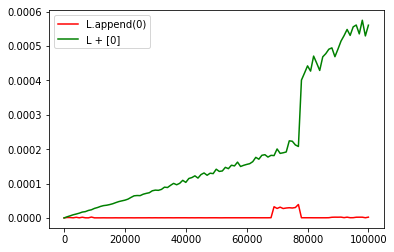

In [20]:
f1 = lambda L : L.append(0)
f2 = lambda L : L + [0]

def finit(params):
    n, = params
    return (n * [0], )

liste_n = [k for k in range(0, 100001, 1000)]
liste_t1, liste_t2 = random_perf_comp((f1, f2), liste_n, nbsim = 50, init = finit)

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(liste_n, liste_t1, 'r-', label = "L.append(0)")
plt.plot(liste_n, liste_t2, 'g-', label = "L + [0]")
plt.legend()
plt.show()

In [ ]:
liste_n = [k for k in range(0, 100000, 1)]
liste_t1 = iter_perf(f1, liste_n, nbsim = 10, init = finit)
plt.plot(liste_n, liste_t1, 'r-', label = "L.append(0)")

plt.legend()
plt.show()

In [ ]:
plt.plot(liste_n[:10000], liste_t1[:10000], 'r-', label = "L.append(0)")

plt.legend()
plt.show()

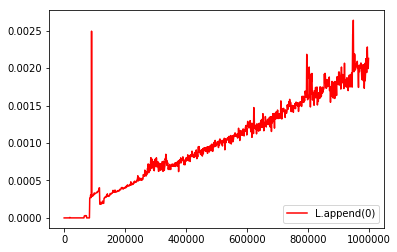

In [13]:
liste_n = [k for k in range(0, 1000001, 1000)]
liste_t1 = iter_perf(f1, liste_n, nbsim = 100, init = finit)
plt.plot(liste_n, liste_t1, 'r-', label = "L.append(0)")

plt.legend()
plt.show()

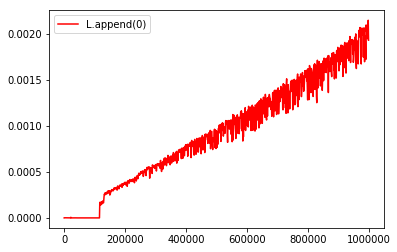

In [14]:
liste_n = [k for k in range(0, 1000001, 1000)]
liste_t1 = random_perf(f1, liste_n, nbsim = 100, init = finit)
plt.plot(liste_n, liste_t1, 'r-', label = "L.append(0)")

plt.legend()
plt.show()

* Normalisation

http://www.python-simple.com/python-numpy/random-numpy.php

In [15]:
import numpy as np

In [16]:
# complexité linéaire
f = lambda t, n : t/n

Ln = np.arange(1, 100)
Lt = np.array([np.random.randint(0, 100) for n in Ln]) # 100 exclu
Ln.shape, Lt.shape

((100,), (100,))

In [17]:
data = np.stack([Ln, Lt], axis = 0)

In [18]:
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
        48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
        64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
        80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95,
        96, 97, 98, 99],
       [19, 42, 71, 31,  1, 91, 48, 95, 27, 14,  6, 77, 36, 61,  0, 52,
        43, 30,  3, 77, 79, 26, 46, 63, 29,  1,  5, 32, 60, 13, 54, 45,
        71, 62, 63, 25, 55,  0, 51, 90, 49, 84, 71, 90, 96, 30, 69, 78,
        10,  5, 66, 22, 60, 68, 74, 72, 85, 61, 66, 91, 12, 90, 86, 62,
         9, 34, 47, 37, 24, 48, 58, 10, 35, 18, 66, 47, 51, 81, 90, 50,
        80, 28, 66, 63, 66, 65, 55, 99, 95, 57, 43, 84, 41, 37, 63, 55,
        11, 41, 50, 43]])

In [19]:
f(data)

TypeError: <lambda>() missing 1 required positional argument: 'n'

In [ ]:
Ln